In [ ]:
## -- IMPORTANT -- ##

## packages in the requirements.txt must be installed in order to run these notebook

# pandas, matplotlib, datetime, miditime, midiutil(version 1.1.1)

In [37]:
from datetime import datetime
from midiutil.MidiFile import MIDIFile
from miditime.miditime import MIDITime

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'.\owid-covid-data.csv')
df = df.loc[df['location'] == 'United Kingdom']
#df = df.loc[df['iso_code'] == 'XXX'] ## alternative way of getting any country with code data

# gather x and y variable from data frame
x = list(df['date']) # x-axis is each date recorded for total cases
y = list(df['new_cases']) # y-axis number of cases each day

In [23]:
print(x[0])

## normalized x-axis as number of days since the first discovery of COVID case

normalized_x = []

# function that converts string to date and get the number of days from the starting point
# the starting point can be modified, to always get the day 1 of the result
# for example the earliest date recorded in the data is 2020-01-31
# then the starting point would be 2020-01-30 -> to achieve day 1 of the point
def normalize_date(x):
    starting_point = datetime.strptime('2020-01-30','%Y-%m-%d') # create date 2020-01-22 as starting point
    for i in range(len(x)):
        temp = datetime.strptime(x[i],'%Y-%m-%d')
        delta = temp-starting_point
        normalized_x.append(delta.days)

normalize_date(x)

2020-01-31


In [24]:
## written function to combine 2 lists into list of tuples
def combine(x, y):
    merged = [(x[i], y[i]) for i in range(len(x))] 
    return merged
      
stats = combine(normalized_x, y)

In [25]:
## find largest y point
print(max(y))

68192.0


In [26]:
## plotting function
def plot_the_graph(stats):
    fig = plt.figure(figsize=(13, 5), dpi = 300) #configure graph size
    axis = fig.add_subplot(111)
    axis.set_ylim(bottom= -5000, ymax=75000)
    
    axis.set_ylabel('Number of Cases')
    axis.set_xlabel('Number of Days')
    
    axis.set_title("Number of daily COVID-19 Cases in United Kingdom")
    
    axis.annotate("Highest Number of Daily COVID Cases on Day 352", xy=(342,68192), xytext=(150,68000),
        arrowprops=dict(facecolor='black', shrink=0.15, width=2),
    )
    
    axis.plot(*zip(*stats), 'ro', markersize=2)

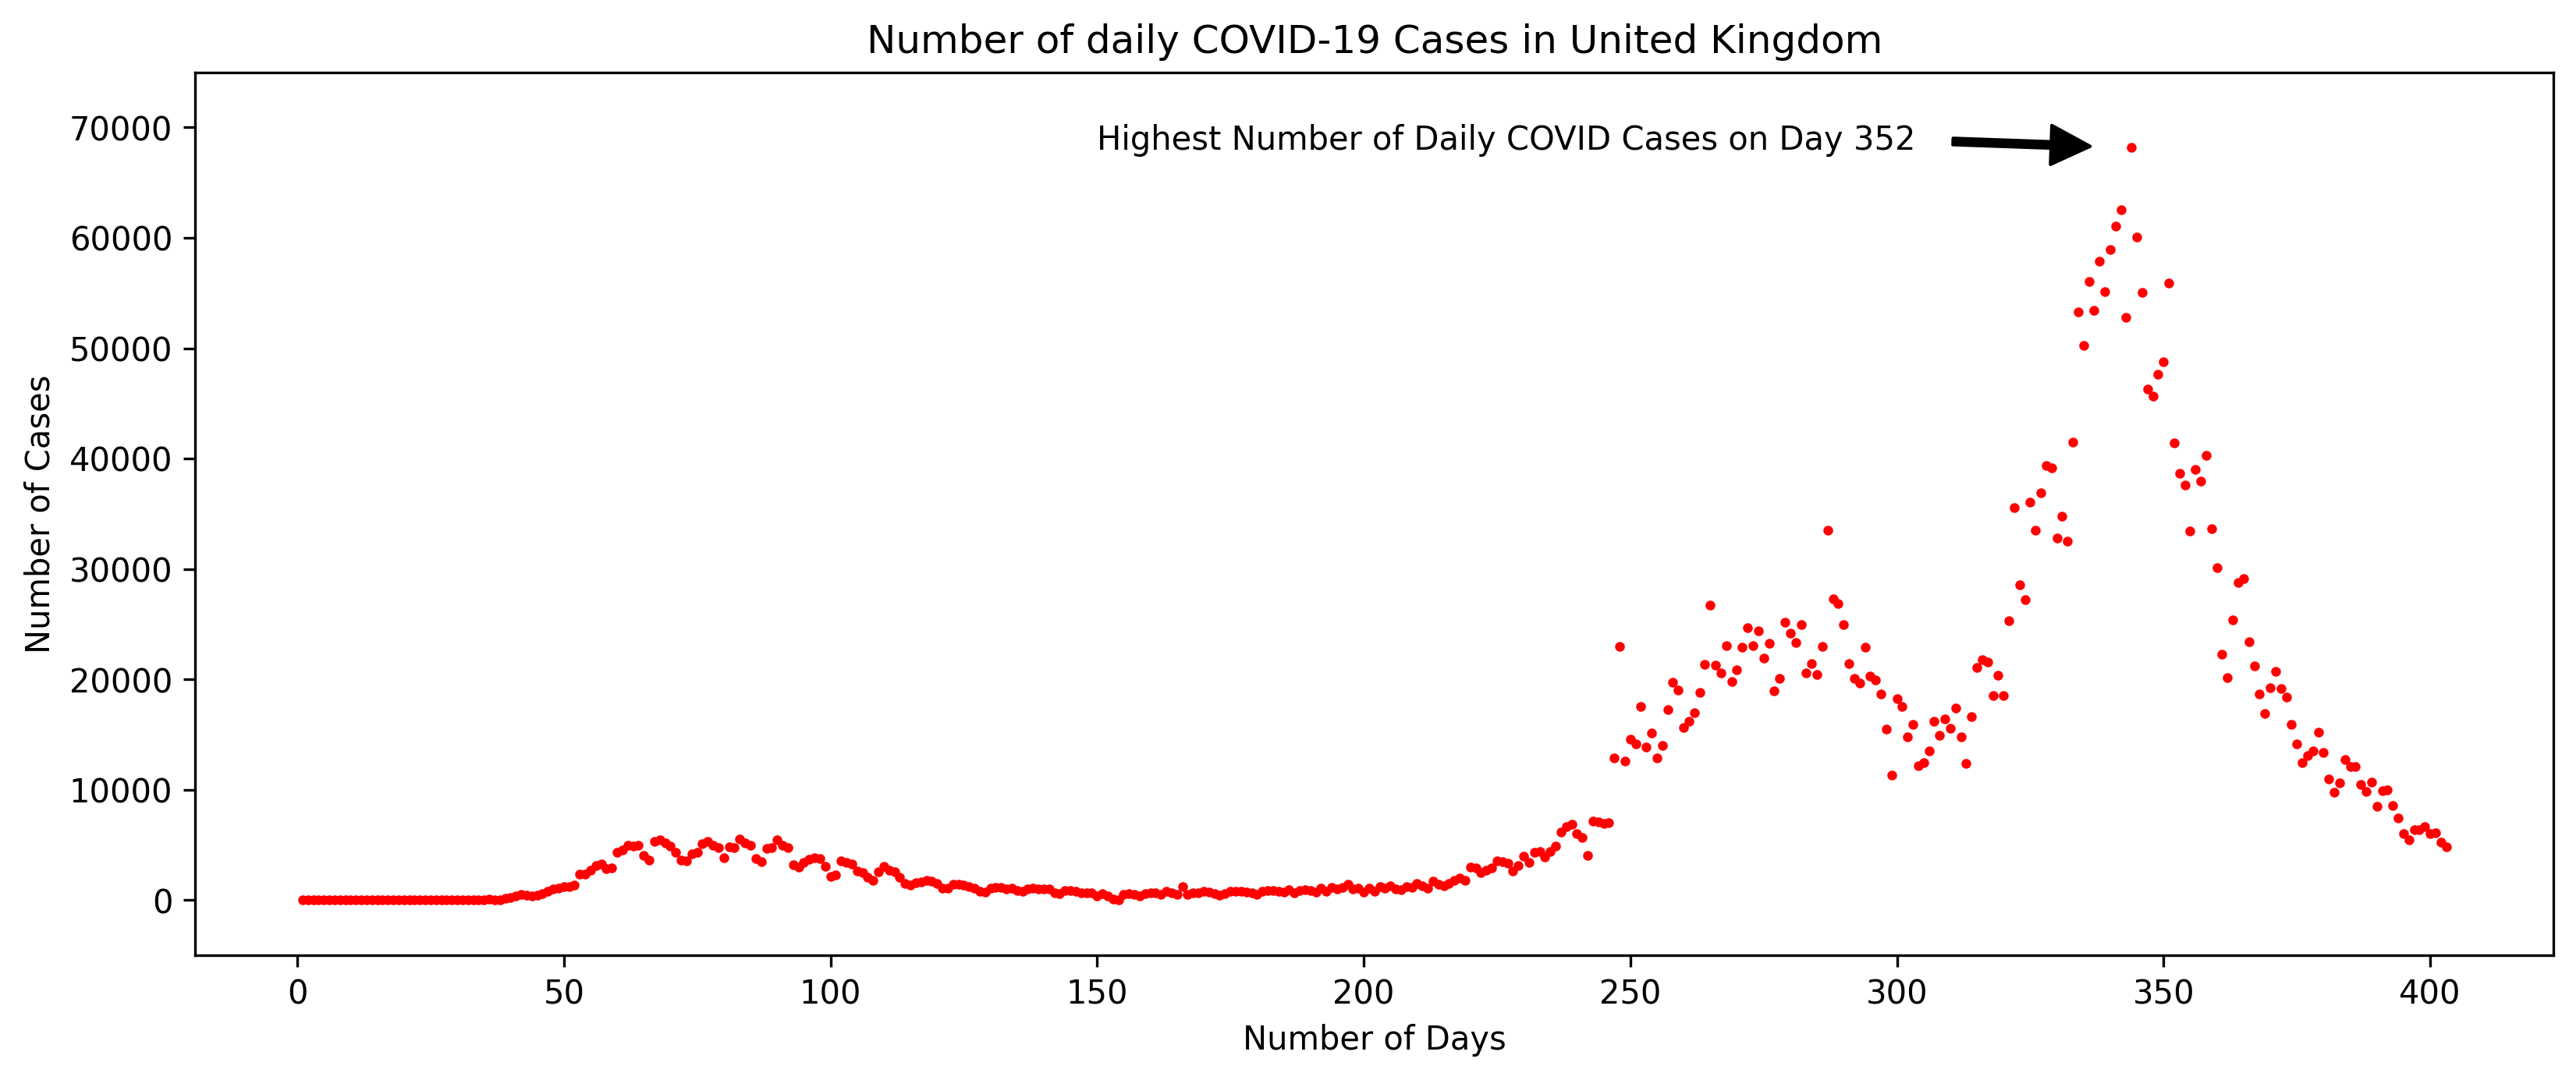

In [27]:
plot_the_graph(stats)

In [28]:
# time to produce the midi from our data

first_midi = MIDITime(300, 'first_midi.mid', 5, 5, 1)

print('First_midi : maxY =',max(y), "& minY =",min(y))

First_midi : maxY = 68192.0 & minY = 0.0


In [29]:
# from the data above we can produce the pitch and configure the scale that our midi will be playing at

def first_midi_pitch(y):
    scale_pct = first_midi.linear_scale_pct(0,68192,y) # original min and max y value
    
    piano_keys = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B','C']
    #pent = ['E','F','A','B','C']
    
    note = first_midi.scale_to_note(scale_pct, piano_keys)
    pitch = first_midi.note_to_midi_pitch(note)
    
    
    return pitch

In [30]:
note_list = []

for d in range(len(y)):
    note_list.append([
        normalized_x[d],
        first_midi_pitch(y[d]),
        65+int(35*(y[d]-min(y))/(max(y)-min(y))),  # velocity variation 65+(35*(varying 0 to 1))
        1  # duration, in beats
    ])

In [31]:
first_midi.add_track(note_list)
first_midi.save_midi()

60 1 1 65
60 2 1 65
60 3 1 65
60 4 1 65
60 5 1 65
60 6 1 65
60 7 1 65
60 8 1 65
60 9 1 65
60 10 1 65
60 11 1 65
60 12 1 65
60 13 1 65
60 14 1 65
60 15 1 65
60 16 1 65
60 17 1 65
60 18 1 65
60 19 1 65
60 20 1 65
60 21 1 65
60 22 1 65
60 23 1 65
60 24 1 65
60 25 1 65
60 26 1 65
60 27 1 65
60 28 1 65
60 29 1 65
60 30 1 65
60 31 1 65
60 32 1 65
60 33 1 65
60 34 1 65
60 35 1 65
60 36 1 65
60 37 1 65
60 38 1 65
60 39 1 65
60 40 1 65
60 41 1 65
60 42 1 65
60 43 1 65
60 44 1 65
60 45 1 65
60 46 1 65
60 47 1 65
60 48 1 65
60 49 1 65
60 50 1 65
60 51 1 65
60 52 1 65
60 53 1 66
60 54 1 66
60 55 1 66
60 56 1 66
60 57 1 66
60 58 1 66
60 59 1 66
60 60 1 67
60 61 1 67
60 62 1 67
60 63 1 67
60 64 1 67
60 65 1 67
60 66 1 66
60 67 1 67
60 68 1 67
60 69 1 67
60 70 1 67
60 71 1 67
60 72 1 66
60 73 1 66
60 74 1 67
60 75 1 67
60 76 1 67
60 77 1 67
60 78 1 67
60 79 1 67
60 80 1 66
60 81 1 67
60 82 1 67
60 83 1 67
60 84 1 67
60 85 1 67
60 86 1 66
60 87 1 66
60 88 1 67
60 89 1 67
60 90 1 67
60 91 1 67
60 92 1 

In [32]:
## printing the note list into csv file

def print_note_to_csv():
    df = pd.DataFrame(note_list, columns = ['beat','note','velocity','time(per beat)'])
    df.to_csv('note_list.csv', index=False)
    
print_note_to_csv() ## command to run the print function

In [33]:
# range 36 - 108

shrinked = []

def shrink(y):
    for i in range(len(y)):
        a = (y[i]-min(y))/(max(y)-min(y))
        b = 108 - 36
        c = (a*b)+36
        shrinked.append(int(c))
        
shrink(y)

In [34]:
def plot_the_notes(stats,stats2):
    fig = plt.figure(figsize=(13, 5), dpi = 300) #configure graph size
    axis = fig.add_subplot(111)
    axis.set_ylim(bottom= 32, ymax=120)
    
    axis.set_ylabel('MIDI Note Number')
    axis.set_xlabel('Beat(s)')
    
    axis.set_title("Notes vs Beats")
    
    
    axis.plot(*zip(*stats2),'bs', label = "accompaniment" , markersize=1.5)
    axis.plot(*zip(*stats), 'rs', label = "main note", markersize=2 )
    
    fig = plt.legend(loc ='upper left')

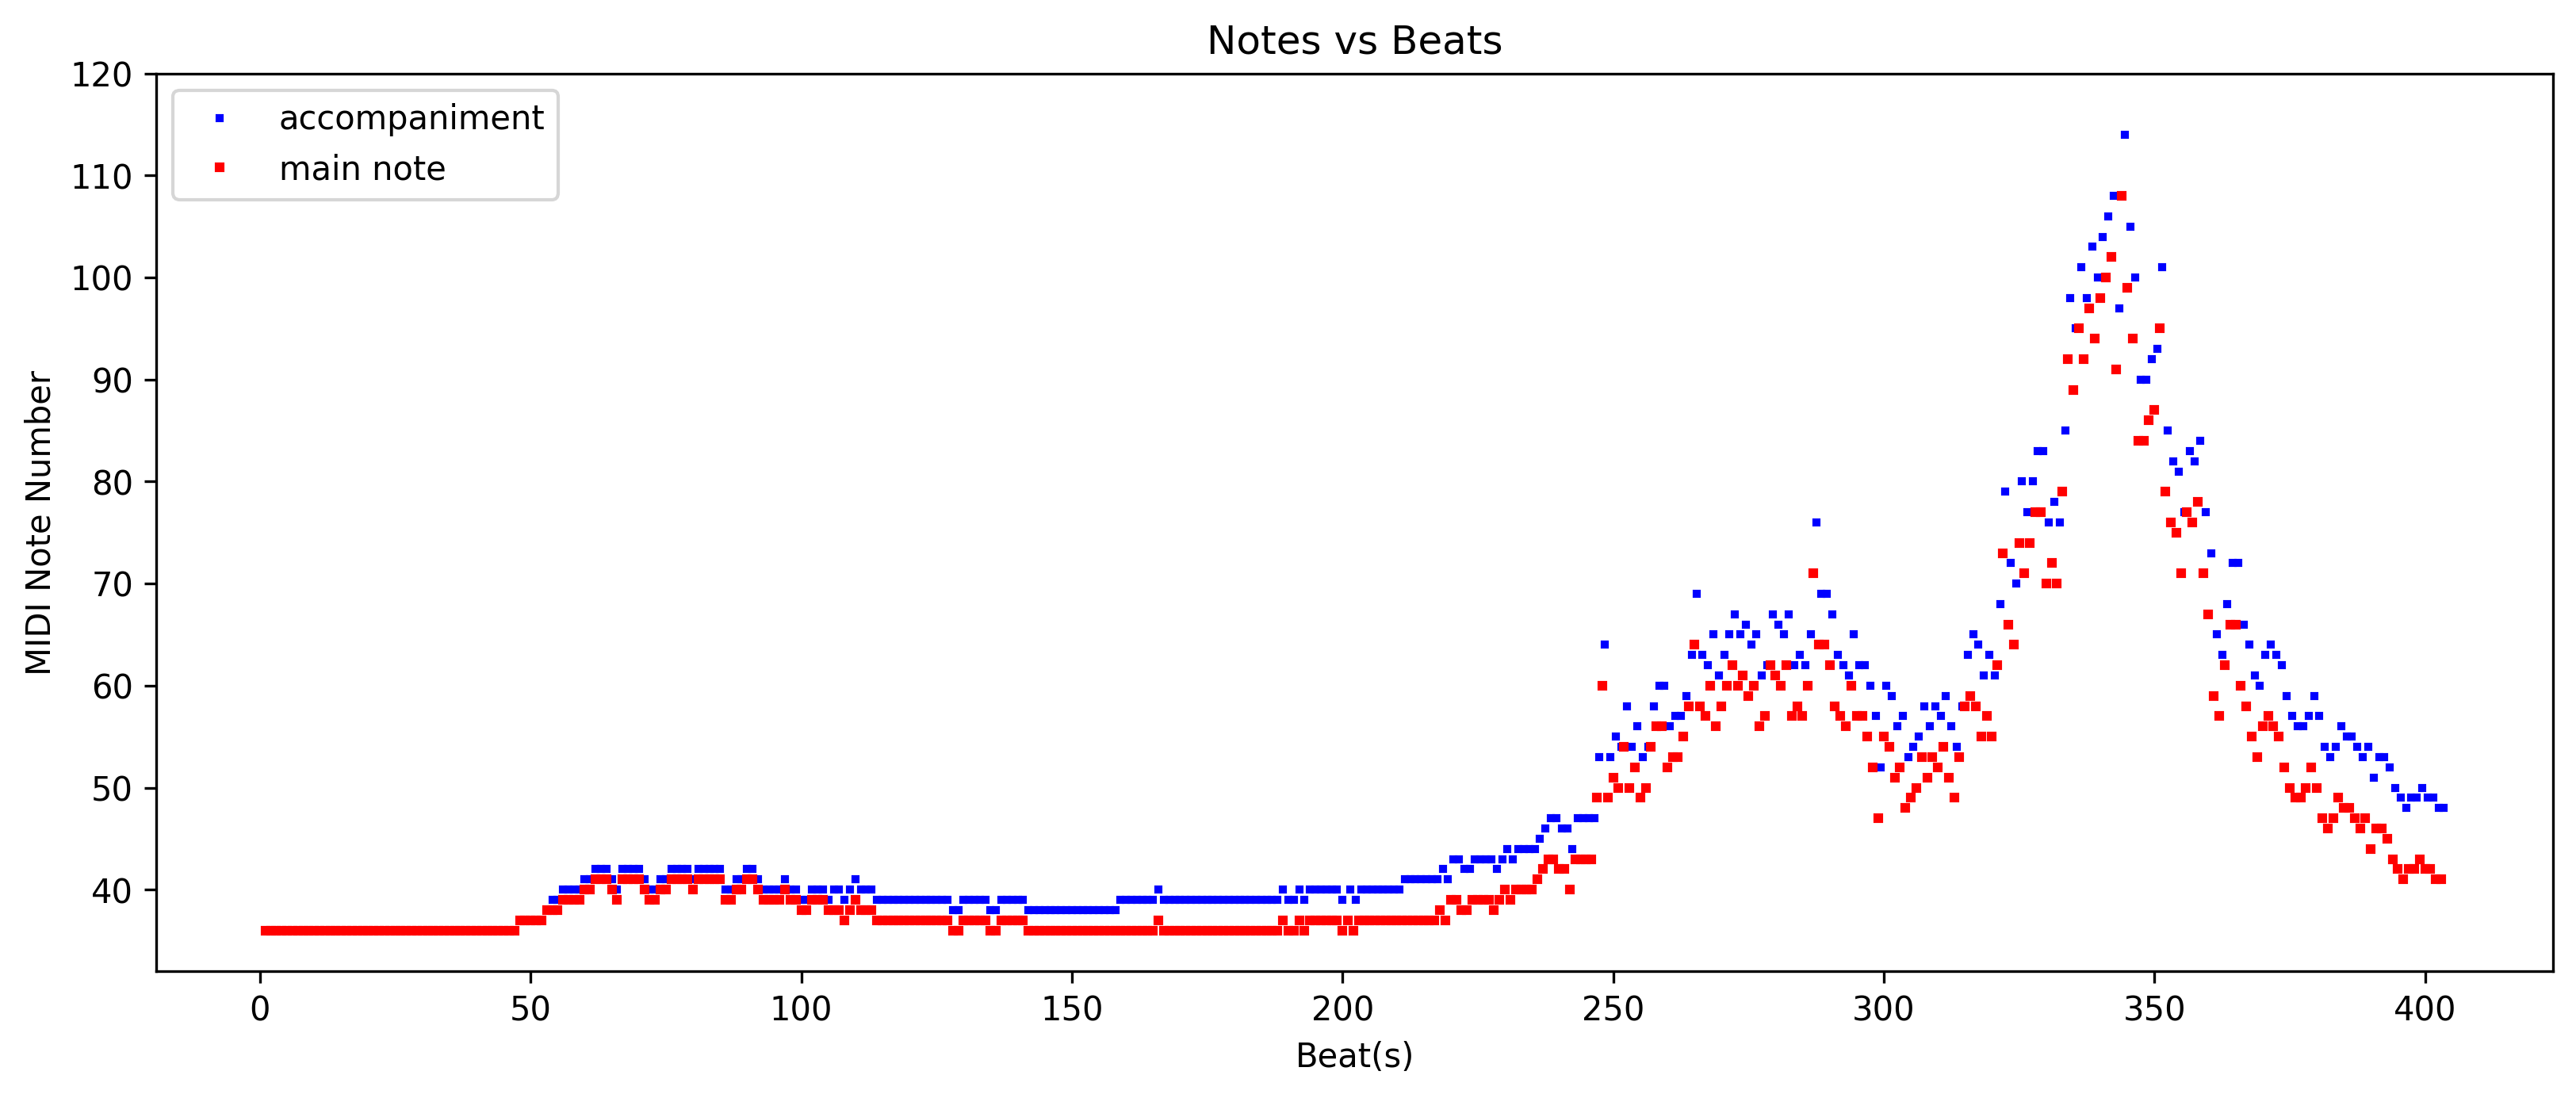

In [35]:
notes = combine(normalized_x,shrinked)
extra = []


for i in range(len(shrinked)):
    extra.append(int(shrinked[i]+(4*(i/210))))

new_x = []

for i in range(len(normalized_x)):
    if(i<200):
        new_x.append(normalized_x[i])
    else:
        new_x.append(normalized_x[i]+0.5)
    
    
notes2 = combine(new_x,extra)
plot_the_notes(notes,notes2)

In [36]:
main = shrinked # Main MIDI note number
main_time = normalized_x

acc = extra # Accompaniment MIDI note number
acc_time = new_x

track = 0

time = 0

duration = 1

main_volume = 65  # 0-127, as per the MIDI standard
acc_volume = 50  # 0-127, as per the MIDI standard

tempo = 300   # In BPM

second_midi = MIDIFile(1)

second_midi.addTempo(track, time, tempo)

for i, pitch in enumerate(main):
    second_midi.addNote(track, 1, main[i], main_time[i], duration, main_volume+int(45*(main[i]-min(main))/(max(main)-min(main))))
    second_midi.addNote(track, 2, acc[i], acc_time[i], duration, acc_volume+int(45*(acc[i]-min(acc))/(max(acc)-min(acc))))
        
with open("second_midi.mid", "wb") as output_file:
    second_midi.writeFile(output_file)

## Ignore, if a warning is on the output cell